In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = pd.read_csv('./input/dcrimeA.csv')

In [3]:
# https://gis.stackexchange.com/questions/174159/convert-a-pandas-dataframe-to-a-geodataframe
from shapely.geometry import Point

In [4]:
df.head()[0:2]

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,...,Cluster 25,010600 2,10600.0,Precinct 83,38.901916,-76.999516,NaN,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,...,Cluster 25,010600 1,10600.0,Precinct 83,38.905024,-76.995538,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031


In [5]:
df.columns

Index(['Unnamed: 0', 'X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD',
       'OFFENSE', 'BLOCK', 'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT',
       'PSA', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID'],
      dtype='object')

In [6]:
# Longitude comes first here!
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
df.drop(['LONGITUDE', 'LATITUDE'], axis=1, inplace=True)
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

In [7]:
gdf.head()

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,BID,START_DATE,END_DATE,OBJECTID,geometry
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,...,104.0,Cluster 25,010600 2,10600.0,Precinct 83,NaN,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019,POINT (-76.9995158028952 38.9019160631833)
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,...,506.0,Cluster 25,010600 1,10600.0,Precinct 83,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031,POINT (-76.99553827514551 38.9050238607243)
2,2,-76.948897,38.885680,11102619,2012-05-14T00:00:00.000Z,MIDNIGHT,GUN,HOMICIDE,153 - 399 BLOCK OF RIDGE ROAD SE,404434.0,...,603.0,Cluster 32,007703 3,7703.0,Precinct 107,NaN,2011-07-17T02:28:00.000Z,NaN,167293017,POINT (-76.94889425531629 38.88567180373229)
3,3,-76.967571,38.855724,11141272,2012-06-25T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,2800 - 2899 BLOCK OF BUENA VISTA TERRACE SE,402815.0,...,702.0,Cluster 36,007502 2,7502.0,Precinct 134,NaN,2011-09-26T06:45:00.000Z,2011-09-26T06:55:00.000Z,167296016,POINT (-76.967568269531 38.85571652660021)
4,4,-76.939620,38.910718,11158196,2012-01-05T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,4280 - 4499 BLOCK OF DOUGLAS STREET NE,405237.0,...,601.0,Cluster 29,009601 1,9601.0,Precinct 92,NaN,2011-10-27T18:35:00.000Z,2011-10-27T00:00:00.000Z,167299077,POINT (-76.9396177835367 38.9107106263643)


In [8]:
psa = gpd.read_file('Police_Service_Areas.geojson')

In [9]:
psa = psa[['PSA','geometry']]
psa.head()

,PSA,geometry
0,708,POLYGON ((-77.00373311312961 38.83098011380654...
1,706,POLYGON ((-76.97982547209897 38.83786582274727...
2,705,POLYGON ((-76.99230859217997 38.84420083957919...
3,707,POLYGON ((-76.99631340902138 38.84654051811096...
4,704,POLYGON ((-76.97453810736511 38.85272679863991...


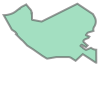

In [10]:
psa['geometry'][8]

In [11]:
geo_df = gpd.sjoin(gdf, psa, how='left', op='within')

In [ ]:
geo_df.drop(['Unnamed: 0'],axis =1, inplace =True)

In [12]:
geo_df.head()[0:5]

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,BID,START_DATE,END_DATE,OBJECTID,geometry,index_right,PSA_right
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,...,010600 2,10600.0,Precinct 83,NaN,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019,POINT (-76.9995158028952 38.9019160631833),20,104
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,...,010600 1,10600.0,Precinct 83,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031,POINT (-76.99553827514551 38.9050238607243),25,506
2,2,-76.948897,38.885680,11102619,2012-05-14T00:00:00.000Z,MIDNIGHT,GUN,HOMICIDE,153 - 399 BLOCK OF RIDGE ROAD SE,404434.0,...,007703 3,7703.0,Precinct 107,NaN,2011-07-17T02:28:00.000Z,NaN,167293017,POINT (-76.94889425531629 38.88567180373229),14,603
3,3,-76.967571,38.855724,11141272,2012-06-25T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,2800 - 2899 BLOCK OF BUENA VISTA TERRACE SE,402815.0,...,007502 2,7502.0,Precinct 134,NaN,2011-09-26T06:45:00.000Z,2011-09-26T06:55:00.000Z,167296016,POINT (-76.967568269531 38.85571652660021),5,702
4,4,-76.939620,38.910718,11158196,2012-01-05T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,4280 - 4499 BLOCK OF DOUGLAS STREET NE,405237.0,...,009601 1,9601.0,Precinct 92,NaN,2011-10-27T18:35:00.000Z,2011-10-27T00:00:00.000Z,167299077,POINT (-76.9396177835367 38.9107106263643),29,601


In [1]:
ax = psa.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
mpd_gdf.plot(scheme='quantiles', markersize=5, column='CENSUS_TRACT', alpha=0.25, ax=ax)

# first ensure that the two geodataframes have the same projection
psa1.crs == mpd_gdf.crs

# goal: find the average mpd crime per PSA

NameError: name 'psa' is not defined